In [1]:
import os
import tensorflow as tf
import tfmodel
import matplotlib.pyplot as plt
import numpy as np

import segmentation_models as sm

from segmentation_models.losses import dice_loss
from segmentation_models.metrics import iou_score

from keras.layers import Input, Conv2D
from keras.models import Model
from keras.optimizers import Adam


DATA_NAME = 'Data'
TRAIN_SOURCE = 'Train'
TEST_SOURCE = 'Test'

WORKING_DIR = os.getcwd()

TRAIN_DATA_DIR = os.path.join(WORKING_DIR, DATA_NAME, TRAIN_SOURCE)
TEST_DATA_DIR = os.path.join(WORKING_DIR, DATA_NAME, TEST_SOURCE)


Could not add gradient for MaxPoolWithArgMax, Likely installed already (tf 1.4)
"Registering two gradient with name 'MaxPoolWithArgmax'! (Previous registration was in register /home/daniele/.local/lib/python3.8/site-packages/tensorflow/python/framework/registry.py:66)"
Segmentation Models: using `keras` framework.


In [2]:
train_data = tfmodel.GetData(TRAIN_DATA_DIR)
test_data = tfmodel.GetData(TEST_DATA_DIR)
print(train_data.images.shape)
print(train_data.labels.shape)


np.random.seed(10)
index = np.random.permutation(526)
#print(index)
### 526 -> 450 train, 76 val

x_train = train_data.images[index[0:450],:,:,:]
y_train = train_data.labels[index[0:450],:,:,:]
print(x_train.shape)
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)


x_val = train_data.images[index[450:],:,:,:]
y_val = train_data.labels[index[450:],:,:,:]
x_val = np.array(x_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)


x_test = test_data.images
y_test = test_data.labels
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)


loading images
finished loading images
Number of examples found:  526
loading images
finished loading images
Number of examples found:  279
(526, 256, 256, 1)
(526, 256, 256, 1)
(450, 256, 256, 1)


In [3]:

bb = "vgg16"
input_shape = (256,256,3)
c = 4
enc_weights = "imagenet"
activation = "softmax"
base_model = sm.Unet(backbone_name = bb, input_shape = input_shape, classes = c, activation=activation, encoder_weights = enc_weights)

# define number of channels
N = x_train.shape[-1] # = 1,
inp = Input(shape=(None, None, N))
l1 = Conv2D(3, (1, 1))(inp) # map N channels data to 3 channels
out = base_model(l1)

modelUnet = Model(inp, out, name=base_model.name)

lr = 0.0001
optim = Adam(lr)

dice_loss = sm.losses.DiceLoss(class_weights=np.array([1, 1, 1, 0.5]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

modelUnet.compile(optim, total_loss, metrics)

modelUnet.load_weights("modelUnet_acdc.keras")


def back_to_1_channel_mask(img, alpha=0.5):
    yy = np.zeros(shape=(1,256,256,1))
    yy += 1.0*(img[:,:,:,0:1]>=alpha)
    yy += 2.0*(img[:,:,:,1:2]>=alpha)
    yy += 3.0*(img[:,:,:,2:3]>=alpha)
    return yy




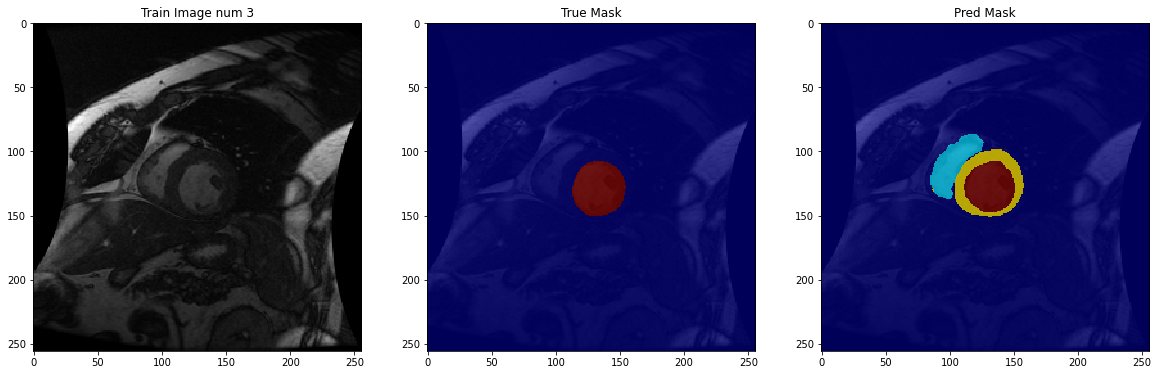

In [11]:
n=3
y_pred = modelUnet.predict(x_train[n:(n+1),:,:,:])
y_pred = back_to_1_channel_mask(y_pred)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
tit = "Train Image num " + str(n)
plt.title(tit)
plt.imshow(x_train[n,:,:,0], 'gray', interpolation='none')
plt.subplot(1,3,2)
plt.title("True Mask")
plt.imshow(x_train[n,:,:,0], 'gray', interpolation='none')
plt.imshow(y_train[n,:,:,0], 'jet', interpolation='none', alpha=0.7)
plt.subplot(1,3,3)
plt.title("Pred Mask")
plt.imshow(x_train[n,:,:,0], 'gray', interpolation='none')
plt.imshow(y_pred[0,:,:,0], 'jet', interpolation='none', alpha=0.7)
plt.savefig("prova1_acdc_on_sunnybrook.png")

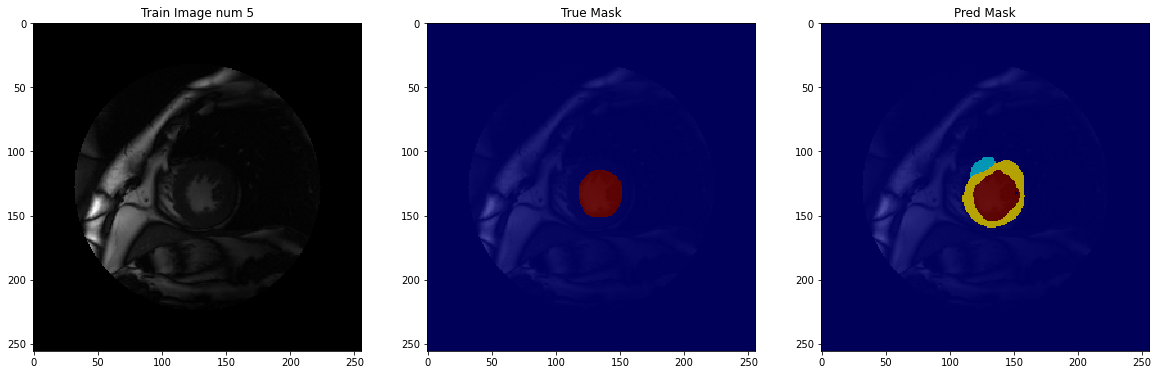

In [14]:
n=5
y_pred = modelUnet.predict(x_train[n:(n+1),:,:,:])
y_pred = back_to_1_channel_mask(y_pred)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
tit = "Train Image num " + str(n)
plt.title(tit)
plt.imshow(x_train[n,:,:,0], 'gray', interpolation='none')
plt.subplot(1,3,2)
plt.title("True Mask")
plt.imshow(x_train[n,:,:,0], 'gray', interpolation='none')
plt.imshow(y_train[n,:,:,0], 'jet', interpolation='none', alpha=0.7)
plt.subplot(1,3,3)
plt.title("Pred Mask")
plt.imshow(x_train[n,:,:,0], 'gray', interpolation='none')
plt.imshow(y_pred[0,:,:,0], 'jet', interpolation='none', alpha=0.7)
plt.savefig("prova2_acdc_on_sunnybrook.png")

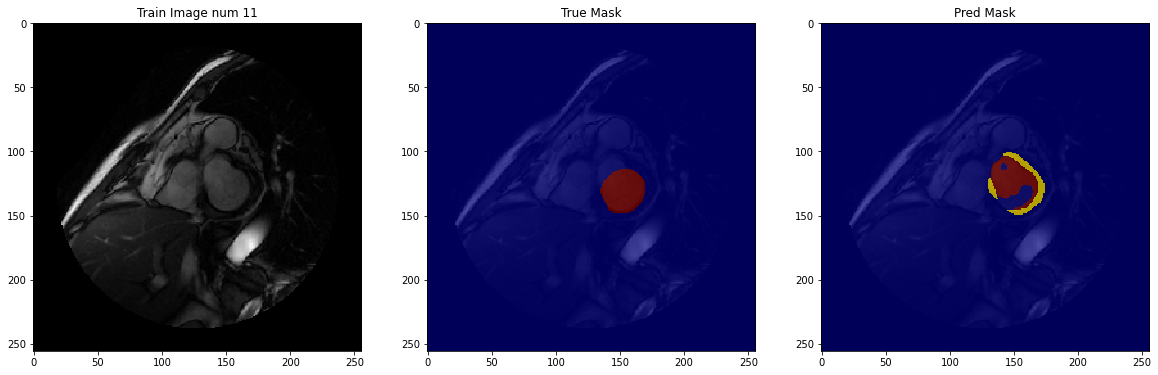

In [19]:
n=11
y_pred = modelUnet.predict(x_train[n:(n+1),:,:,:])
y_pred = back_to_1_channel_mask(y_pred)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
tit = "Train Image num " + str(n)
plt.title(tit)
plt.imshow(x_train[n,:,:,0], 'gray', interpolation='none')
plt.subplot(1,3,2)
plt.title("True Mask")
plt.imshow(x_train[n,:,:,0], 'gray', interpolation='none')
plt.imshow(y_train[n,:,:,0], 'jet', interpolation='none', alpha=0.7)
plt.subplot(1,3,3)
plt.title("Pred Mask")
plt.imshow(x_train[n,:,:,0], 'gray', interpolation='none')
plt.imshow(y_pred[0,:,:,0], 'jet', interpolation='none', alpha=0.7)
plt.savefig("prova3_acdc_on_sunnybrook.png")